**1. Data Collection & Loading**

In [ ]:
import pandas as pd

In [ ]:
import kagglehub
dataset_path = kagglehub.dataset_download("arunjangir245/boston-housing-dataset")
print("Path to dataset files:", dataset_path)

Using Colab cache for faster access to the 'boston-housing-dataset' dataset.
Path to dataset files: /kaggle/input/boston-housing-dataset


In [ ]:
data=pd.read_csv(dataset_path+"/BostonHousing.csv")
print("Dataset Loaded Successfully!\n")

Dataset Loaded Successfully!



In [ ]:
print("Dataset shape (rows, columns):", data.shape)

Dataset shape (rows, columns): (506, 14)


In [ ]:
print("Columns names:\n", data.columns.tolist())

Columns names:
 ['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax', 'ptratio', 'b', 'lstat', 'medv']


**Boston Housing dataset columns descriptions are:**

* crim  : Per capita crime rate by town.
* zn    : Proportion of large residential lots (over 25,000 sq. ft.).
* indus : Proportion of non-retail business acres per town.
* Chas  : Binary variable indicating if the property is near Charles River (1 for yes, 0 for no).
* nox   : Concentration of nitrogen oxides in the air.
* rm    : Average number of rooms per dwelling.
* age   : Proportion of old owner-occupied units built before 1940.
* dis   : Weighted distances to Boston employment centers.
* rad   : Index of accessibility to radial highways.
* tax   : Property tax rate per $10,000.

In [ ]:
col_info = pd.DataFrame({
    'Column Name': data.columns,
    'Data Type': data.dtypes.values
})
print(col_info)

   Column Name Data Type
0         crim   float64
1           zn   float64
2        indus   float64
3         chas     int64
4          nox   float64
5           rm   float64
6          age   float64
7          dis   float64
8          rad     int64
9          tax     int64
10     ptratio   float64
11           b   float64
12       lstat   float64
13        medv   float64


**2. Data Preprocessing**

In [ ]:
print("\nDataset information: \n")
print(data.info())


Dataset information: 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       501 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB
None


In [ ]:
# Quick preview from first five rows of dataset
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [ ]:
#checking how many missing(null) values each column in the dataset
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,5
age,0
dis,0
rad,0
tax,0


In [ ]:
#we found that rm has 5 null values. so we filled it with the mean of that column
data['rm'].fillna(data['rm'].mean(), inplace=True)

/tmp/ipython-input-1857788199.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['rm'].fillna(data['rm'].mean(), inplace=True)


In [ ]:
data.isnull().sum()

,0
crim,0
zn,0
indus,0
chas,0
nox,0
rm,0
age,0
dis,0
rad,0
tax,0


In [ ]:
data.nunique()

,0
crim,504
zn,26
indus,76
chas,2
nox,81
rm,442
age,356
dis,412
rad,9
tax,66


In [ ]:
# Machine learning models can’t handle text, so we must convert categorical values into numbers. This is called encoding.
# checking which columns are categorical
data.dtypes

,0
crim,float64
zn,float64
indus,float64
chas,int64
nox,float64
rm,float64
age,float64
dis,float64
rad,int64
tax,int64


* In this dataset when we check for data types, we can see that we don't have categorical values to convert into numbers. So we don't have to do any encoding here.

In [ ]:
# to check statistical summary of all numerical columns
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284341,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702085,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.210000,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.618750,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

import numpy as np
import matplotlib.pyplot as plt

In [ ]:
# Split features/target
X = data.drop(columns=['medv']) #inputs/features (X) column
y = data['medv']                #output/target (y) column
# Here "medv" is the target variable. All the others crim, zn, indus, etc. are feature variables

In [ ]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# test_size=0.2 : 20% of data used for testing, 80% for training
# random_state=42 : Ensures reproducibility — same random split every time

In [ ]:
# applying scaling after splitting data into train/test sets to avoid leakage.

# Initialize the scaler
scaler = StandardScaler()

In [ ]:
# Fit on training data, transform both train and test
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("Before scaling:\n", X_train.describe().T[['mean', 'std']].head())
print("\nAfter scaling (mean ≈ 0, std ≈ 1):")
print(pd.DataFrame(X_train_scaled, columns=X.columns).describe().T[['mean', 'std']].head())


Before scaling:
             mean        std
crim    3.609125   8.875058
zn     11.569307  23.152481
indus  10.985050   6.894618
chas    0.071782   0.258447
nox     0.556484   0.117704

After scaling (mean ≈ 0, std ≈ 1):
               mean      std
crim  -2.638154e-17  1.00124
zn     0.000000e+00  1.00124
indus -4.177077e-17  1.00124
chas   1.319077e-17  1.00124
nox   -5.111423e-16  1.00124


In [ ]:
# Check the shapes
print("Training set:", X_train.shape, y_train.shape)
print("Testing set:", X_test.shape, y_test.shape)

Training set: (404, 13) (404,)
Testing set: (102, 13) (102,)


In [ ]:
print("Training target mean:", y_train.mean())
print("Testing target mean:", y_test.mean())

Training target mean: 22.796534653465343
Testing target mean: 21.488235294117644


**3. Exploratory Data Analysis (EDA)**

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

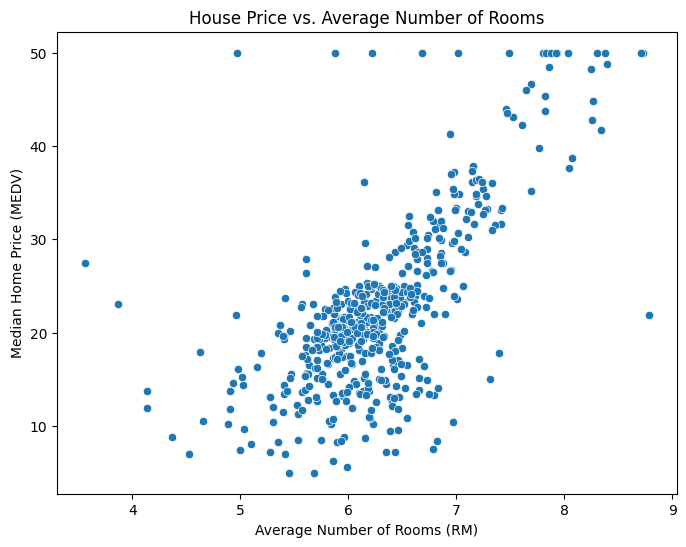

In [ ]:
# Relationship Plot: RM vs MEDV

plt.figure(figsize=(8,6))
sns.scatterplot(x=data['rm'], y=data['medv'])
plt.title("House Price vs. Average Number of Rooms")
plt.xlabel("Average Number of Rooms (RM)")
plt.ylabel("Median Home Price (MEDV)")
plt.show()


* More rooms → higher house price
* One of the strongest positive correlation
* Easy to interpret

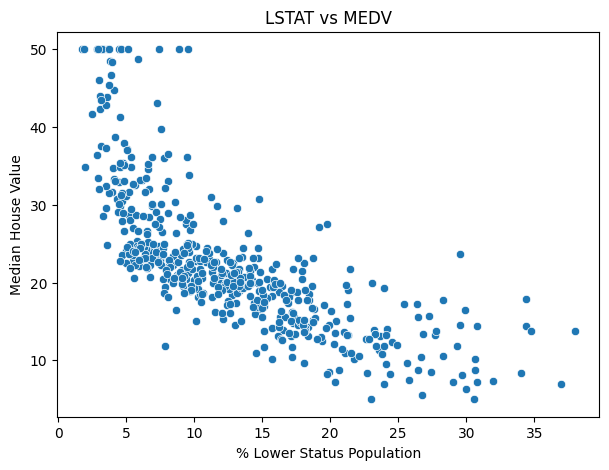

In [ ]:
# Relationship Plot: LSTAT vs MEDV

plt.figure(figsize=(7,5))
sns.scatterplot(x=data['lstat'], y=data['medv'])
plt.title("LSTAT vs MEDV")
plt.xlabel("% Lower Status Population")
plt.ylabel("Median House Value")
plt.show()

* Lower status population → higher price (strong negative correlation)
* Shows socioeconomic effect on price

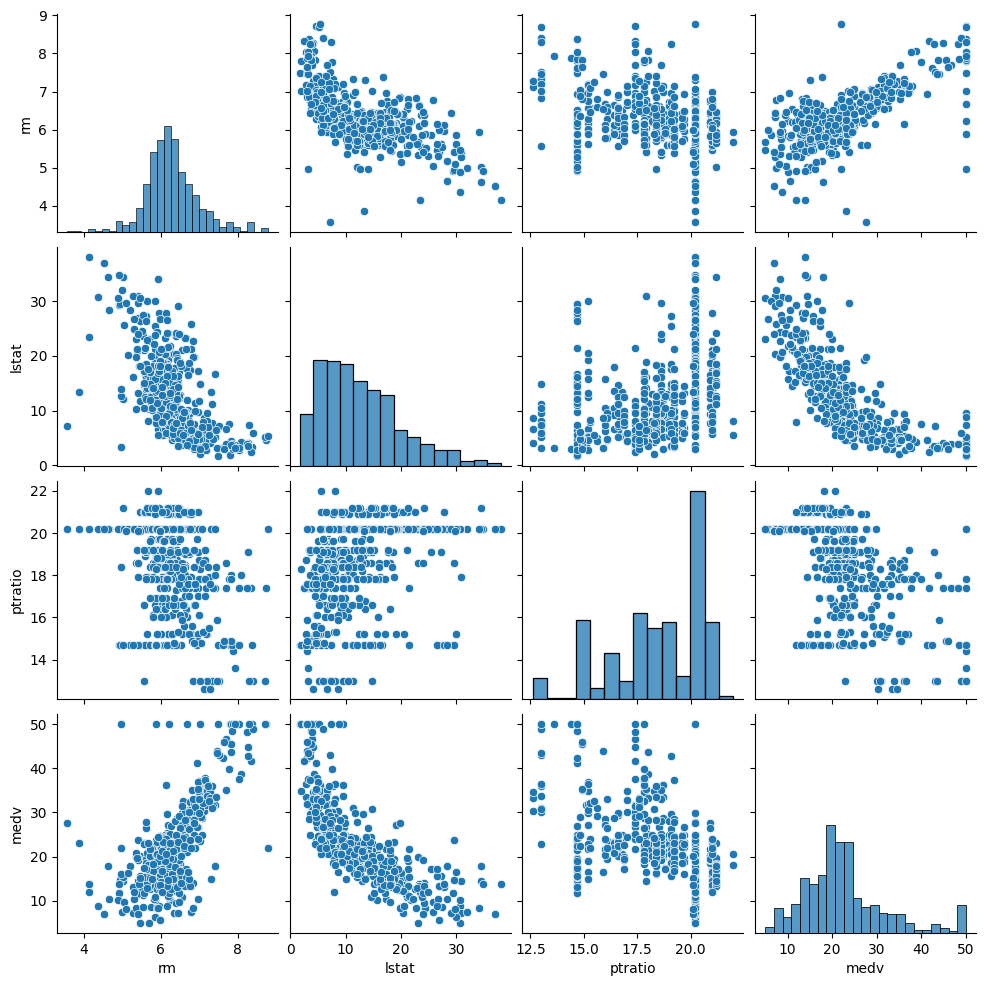

In [ ]:
# Scatterplot Matrix
# Pairwise relationship across multiple variables is shown here

sns.pairplot(data[['rm', 'lstat', 'ptratio', 'medv']])
plt.show()


* Reveals linear trends(Detects linear or nonlinear relationships.)
* Highlights clusters or irregular patterns.
* Identifies potential outliers.

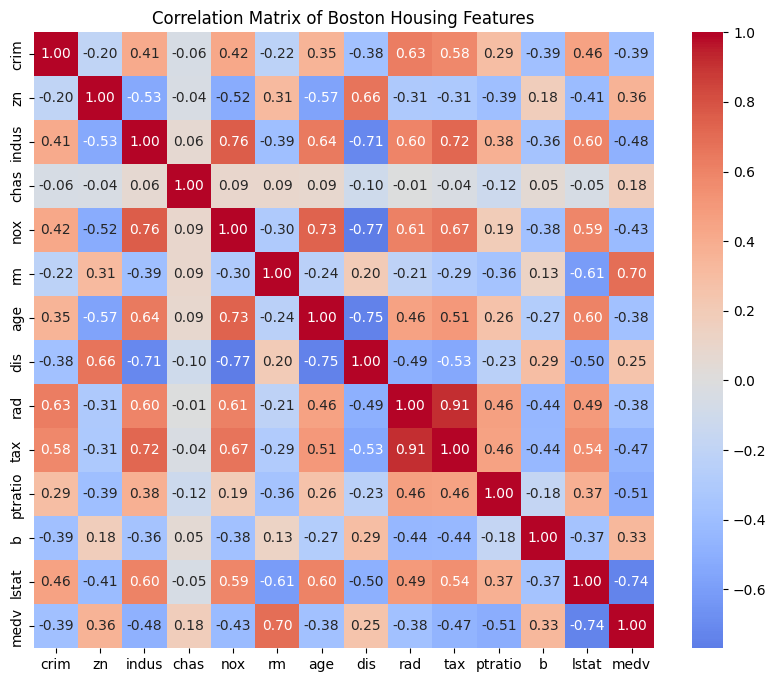

In [ ]:
# Correlation Heatmap
# Here shows how strongly each feature is correlated with the
# target and with other variables.

plt.figure(figsize=(10,8))
corr = data.corr()
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt=".2f", center=0)
plt.title("Correlation Matrix of Boston Housing Features")
plt.show()


* Quickly identifies important predictors
* Shows multicollinearity (features highly correlated with each other)

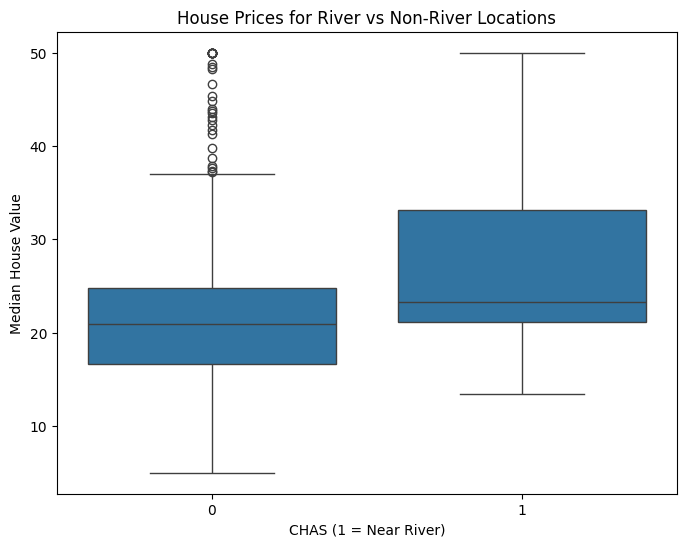

In [ ]:
# Boxplots for Categorical Variable (CHAS)
# Here boxplot helps to compare price difference between two groups

plt.figure(figsize=(8,6))
sns.boxplot(x=data['chas'], y=data['medv'])
plt.title("House Prices for River vs Non-River Locations")
plt.xlabel("CHAS (1 = Near River)")
plt.ylabel("Median House Value")
plt.show()


* CHAS = 1 → adjacency to Charles River
* CHAS = 0 → not near river

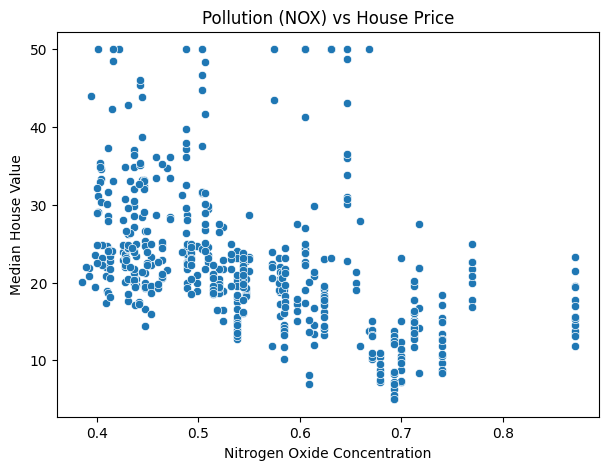

In [ ]:
# Scatterplot: NOX vs MEDV
# Here scatterplot is used to show impact of air pollution on house prices

plt.figure(figsize=(7,5))
sns.scatterplot(x=data['nox'], y=data['medv'])
plt.title("Pollution (NOX) vs House Price")
plt.xlabel("Nitrogen Oxide Concentration")
plt.ylabel("Median House Value")
plt.show()

* Pollution generally reduces property value
* Relationship may show curvature (non-linear)

**4. Model Building**

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()

In [ ]:
# Build pipeline: impute missing values, scale, then linear regression
model = Pipeline([
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler()),
    ('lr', LinearRegression())
])

In [ ]:
# Train (fit) the model
model.fit(X_train, y_train)
# X_train = training features and y_train = training target variable

# Make predictions on the test data
y_pred = model.predict(X_test)
# X_test = data the model has never seen
# y_pred = model’s predicted house prices

In [ ]:
coefficients = pd.DataFrame({
    'Feature': X_train.columns,
    'Coefficient': model.named_steps['lr'].coef_
})

print(coefficients)

    Feature  Coefficient
0      crim    -1.002087
1        zn     0.698551
2     indus     0.287331
3      chas     0.719551
4       nox    -2.020708
5        rm     3.137089
6       age    -0.170813
7       dis    -3.069724
8       rad     2.254179
9       tax    -1.766977
10  ptratio    -2.043595
11        b     1.129370
12    lstat    -3.614514


In [ ]:
# Check the intercept
print("Intercept:", model.named_steps['lr'].intercept_)

Intercept: 22.796534653465343


In [ ]:
# Calculating the metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae:.3f}")
print(f"Mean Squared Error (MSE): {mse:.3f}")
print(f"R² Score: {r2:.3f}")


Mean Absolute Error (MAE): 3.206
Mean Squared Error (MSE): 24.405
R² Score: 0.667


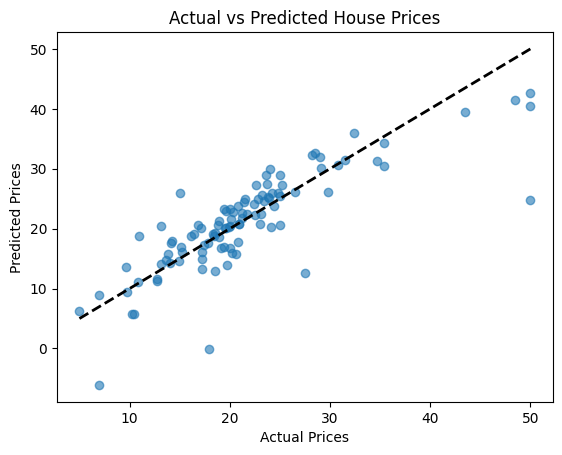

In [ ]:
# Predicted vs Actual Price Plot

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs Predicted House Prices")
plt.show()

* Points close to the dash line are good predictions
* Points far away outliers (errors)

**6. Optimization**

*a. Polynomial Regression*

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
# Create polynomial features

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)


In [ ]:
# Train the model

poly_model = LinearRegression()
poly_model.fit(X_train_poly, y_train)

LinearRegression()

In [ ]:
# Predictions

y_pred_poly = poly_model.predict(X_test_poly)

In [ ]:
# Evaluate Polynomial Regression

print("Polynomial Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_poly))
print("MSE:", mean_squared_error(y_test, y_pred_poly))
print("R² Score:", r2_score(y_test, y_pred_poly))

Polynomial Regression Results:
MAE: 2.6080475270627206
MSE: 14.617143206158048
R² Score: 0.8006765425669923


*b. Ridge Regression*

In [ ]:
from sklearn.linear_model import Ridge

In [ ]:
# Train

ridge = Ridge(alpha=1.0)
ridge.fit(X_train, y_train)
y_pred_ridge = ridge.predict(X_test)

In [ ]:
# Evaluate

print("Ridge Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_ridge))
print("MSE:", mean_squared_error(y_test, y_pred_ridge))
print("R² Score:", r2_score(y_test, y_pred_ridge))

Ridge Regression Results:
MAE: 3.150166625990244
MSE: 24.579078206712843
R² Score: 0.664832807643677


*c. Lasso Regression*

In [ ]:
from sklearn.linear_model import Lasso

In [ ]:
# Train

lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)
y_pred_lasso = lasso.predict(X_test)

In [ ]:
# Evaluate

print("Lasso Regression Results:")
print("MAE:", mean_absolute_error(y_test, y_pred_lasso))
print("MSE:", mean_squared_error(y_test, y_pred_lasso))
print("R² Score:", r2_score(y_test, y_pred_lasso))

Lasso Regression Results:
MAE: 3.1623049247840793
MSE: 25.231228492625718
R² Score: 0.6559399037485223


In [ ]:
# Comparison of All Models

results = pd.DataFrame({
    "Model": ["Linear", "Polynomial (deg=2)", "Ridge", "Lasso"],
    "MAE": [
        mean_absolute_error(y_test, y_pred),
        mean_absolute_error(y_test, y_pred_poly),
        mean_absolute_error(y_test, y_pred_ridge),
        mean_absolute_error(y_test, y_pred_lasso)
    ],
    "MSE": [
        mean_squared_error(y_test, y_pred),
        mean_squared_error(y_test, y_pred_poly),
        mean_squared_error(y_test, y_pred_ridge),
        mean_squared_error(y_test, y_pred_lasso)
    ],
    "R² Score": [
        r2_score(y_test, y_pred),
        r2_score(y_test, y_pred_poly),
        r2_score(y_test, y_pred_ridge),
        r2_score(y_test, y_pred_lasso)
    ]
})

results


,Model,MAE,MSE,R² Score
0,Linear,3.206404,24.404825,0.667209
1,Polynomial (deg=2),2.608048,14.617143,0.800677
2,Ridge,3.150167,24.579078,0.664833
3,Lasso,3.162305,25.231228,0.655940
